In [93]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.distance import great_circle

In [94]:
from src import Root
root = Root()

In [95]:
root.lib.jupyter_settings()

In [96]:
data = root.read.origins.dataframe

In [97]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10964,-117.88,33.78,26.00,3141.00,670.00,1572.00,724.00,3.35,237400.00,<1H OCEAN
5899,-118.31,34.16,37.00,2144.00,446.00,860.00,435.00,3.95,315000.00,<1H OCEAN
16480,-121.28,38.17,19.00,1337.00,236.00,744.00,225.00,4.09,244200.00,INLAND
12276,-117.11,33.98,25.00,1254.00,312.00,715.00,301.00,2.73,149000.00,INLAND
12858,-121.38,38.67,38.00,1001.00,228.00,597.00,226.00,2.28,73400.00,INLAND
11040,-117.81,33.81,19.00,3154.00,390.00,1404.00,384.00,8.93,431800.00,<1H OCEAN
19154,-122.69,38.37,8.00,6322.00,1001.00,2969.00,1043.00,4.82,214000.00,<1H OCEAN
3402,-118.35,34.27,32.00,604.00,108.00,314.00,113.00,6.20,205400.00,<1H OCEAN
3039,-119.12,35.37,13.00,4527.00,713.00,2170.00,671.00,4.83,146200.00,INLAND
13449,-117.40,34.08,21.00,3622.00,667.00,2503.00,720.00,3.85,105400.00,INLAND


In [98]:
#predict the median house value
data = data.rename(columns={'median_house_value': 'target'})

In [99]:
data.shape

(20640, 10)

In [100]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


<Axes: xlabel='target', ylabel='Count'>

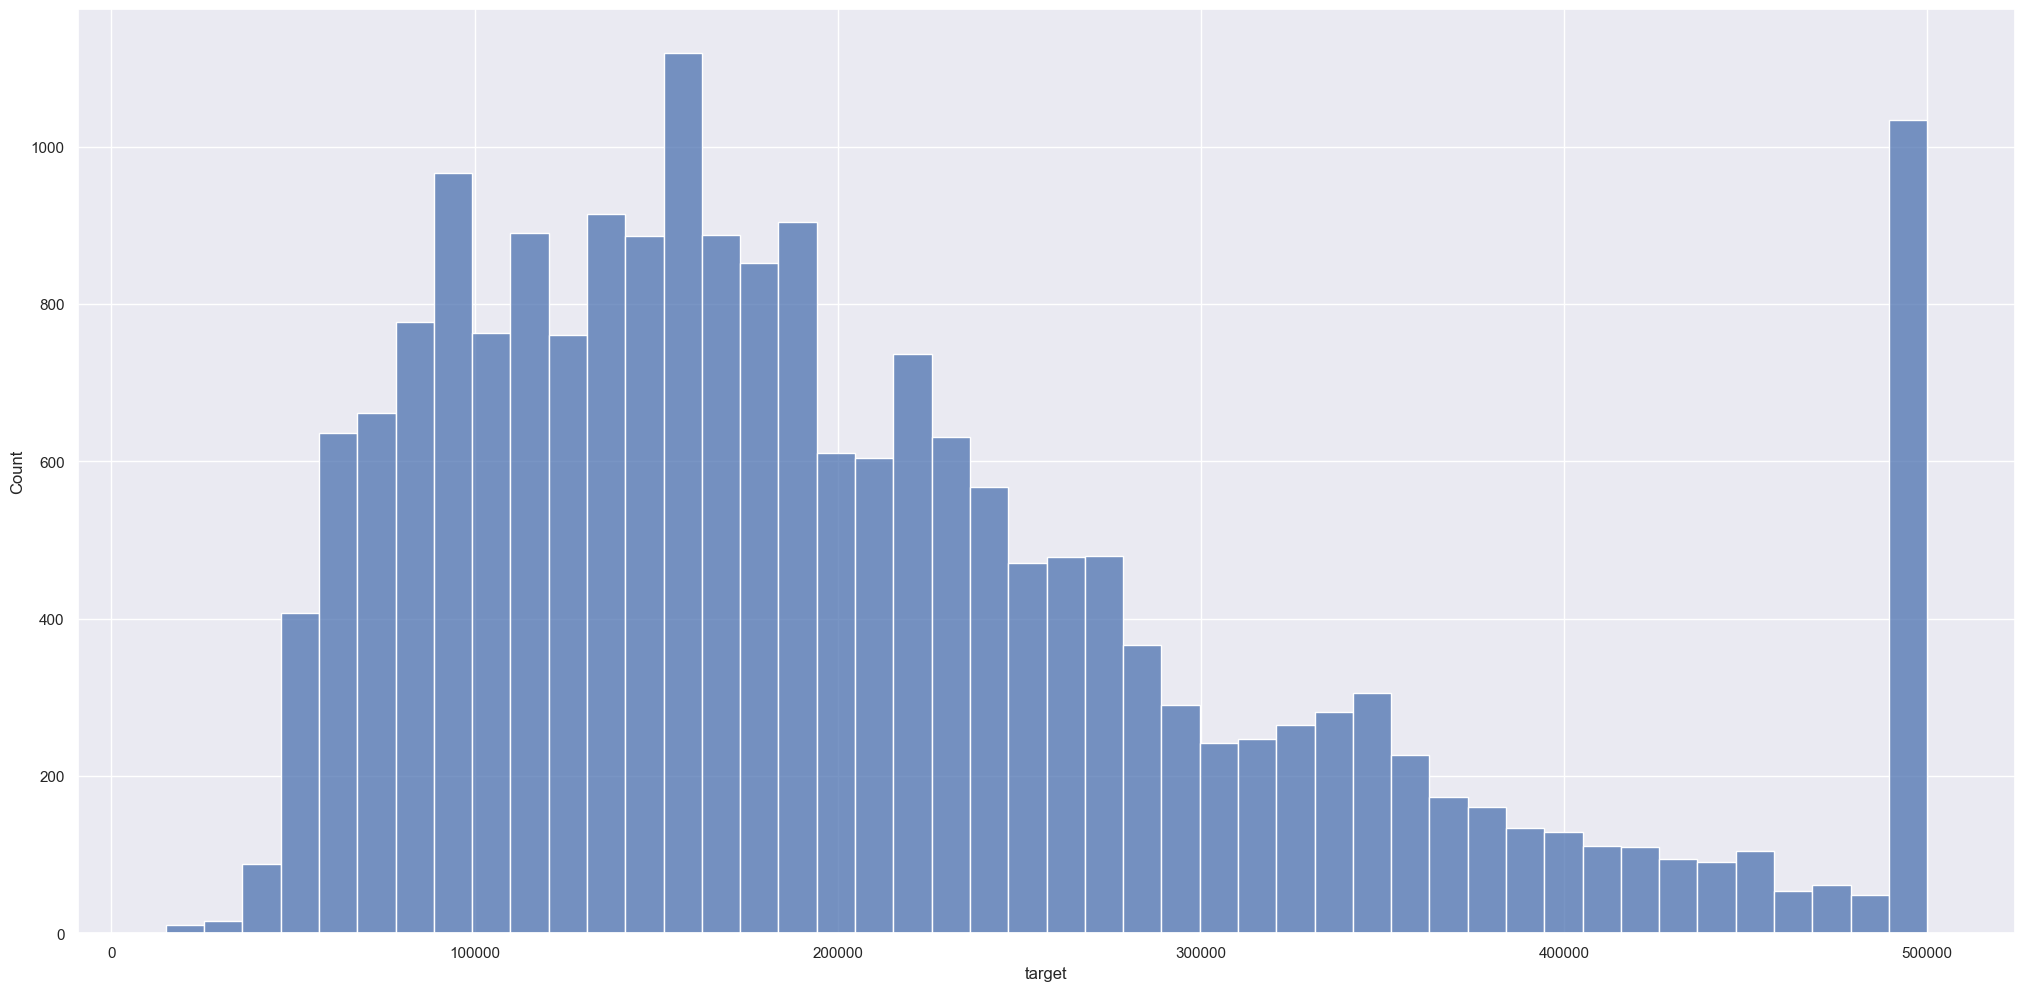

In [101]:
sns.histplot(data["target"])

<Axes: xlabel='target', ylabel='Count'>

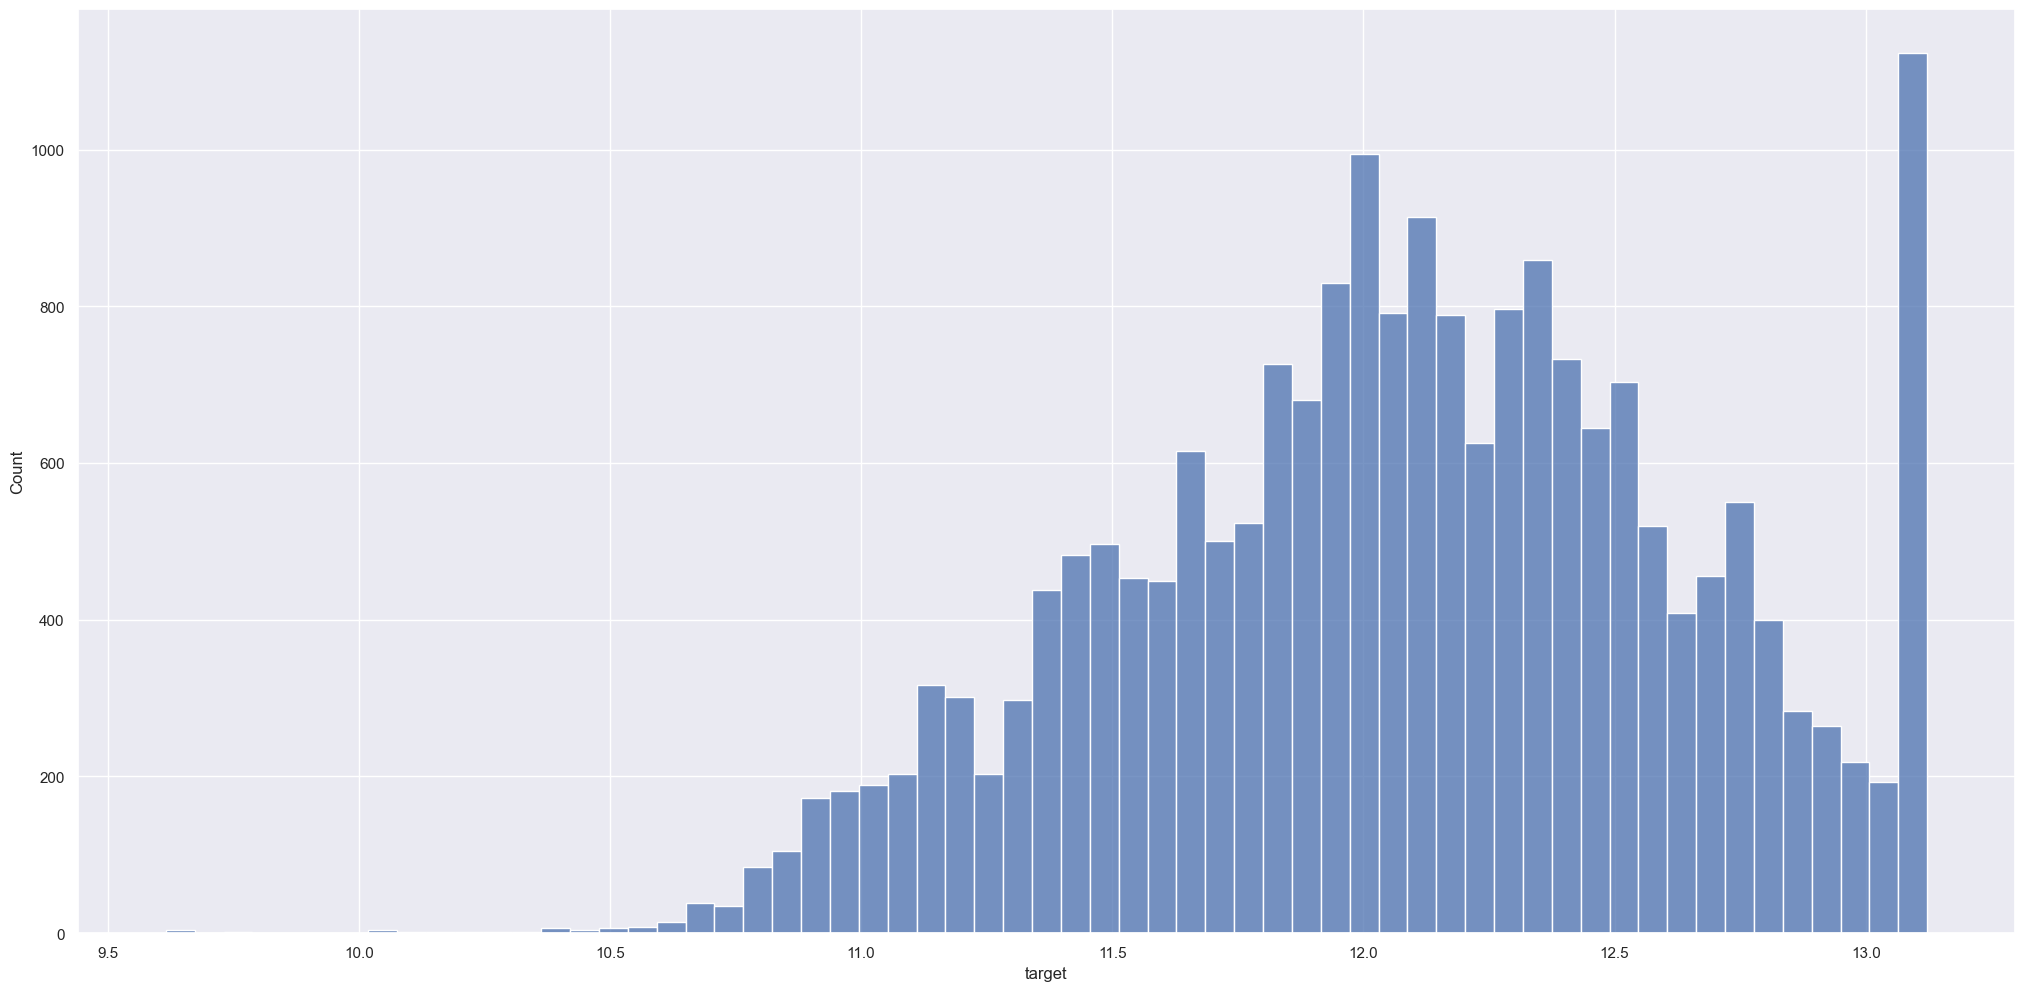

In [102]:
sns.histplot(np.log1p(data["target"]))

In [103]:
data.query("target > 500000").sample(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity
5357,-118.39,34.05,42.00,3105.00,559.00,1253.00,531.00,5.22,500001.00,<1H OCEAN
8807,-118.38,33.75,23.00,8277.00,1290.00,3176.00,1159.00,7.70,500001.00,NEAR OCEAN
6919,-117.99,33.97,18.00,4078.00,484.00,1490.00,482.00,10.80,500001.00,<1H OCEAN
4014,-118.57,34.15,22.00,5791.00,706.00,2059.00,673.00,10.92,500001.00,<1H OCEAN
10518,-117.71,33.51,12.00,4676.00,698.00,1543.00,598.00,6.38,500001.00,<1H OCEAN
15667,-122.44,37.80,52.00,2869.00,594.00,500.00,335.00,5.04,500001.00,NEAR BAY
5307,-118.44,34.05,18.00,4780.00,1192.00,1886.00,1036.00,4.47,500001.00,<1H OCEAN
18331,-122.15,37.45,52.00,568.00,91.00,219.00,75.00,6.16,500001.00,NEAR BAY
18272,-122.09,37.36,37.00,2269.00,325.00,930.00,321.00,7.53,500001.00,NEAR BAY
6591,-118.19,34.19,34.00,2061.00,260.00,825.00,254.00,15.00,500001.00,<1H OCEAN


In [104]:
data.query("target >= 500000").shape[0] / data.shape[0]  

0.04806201550387597

In [105]:
high_value = data.query("target >= 500000")
rest = data.query("target < 500000")

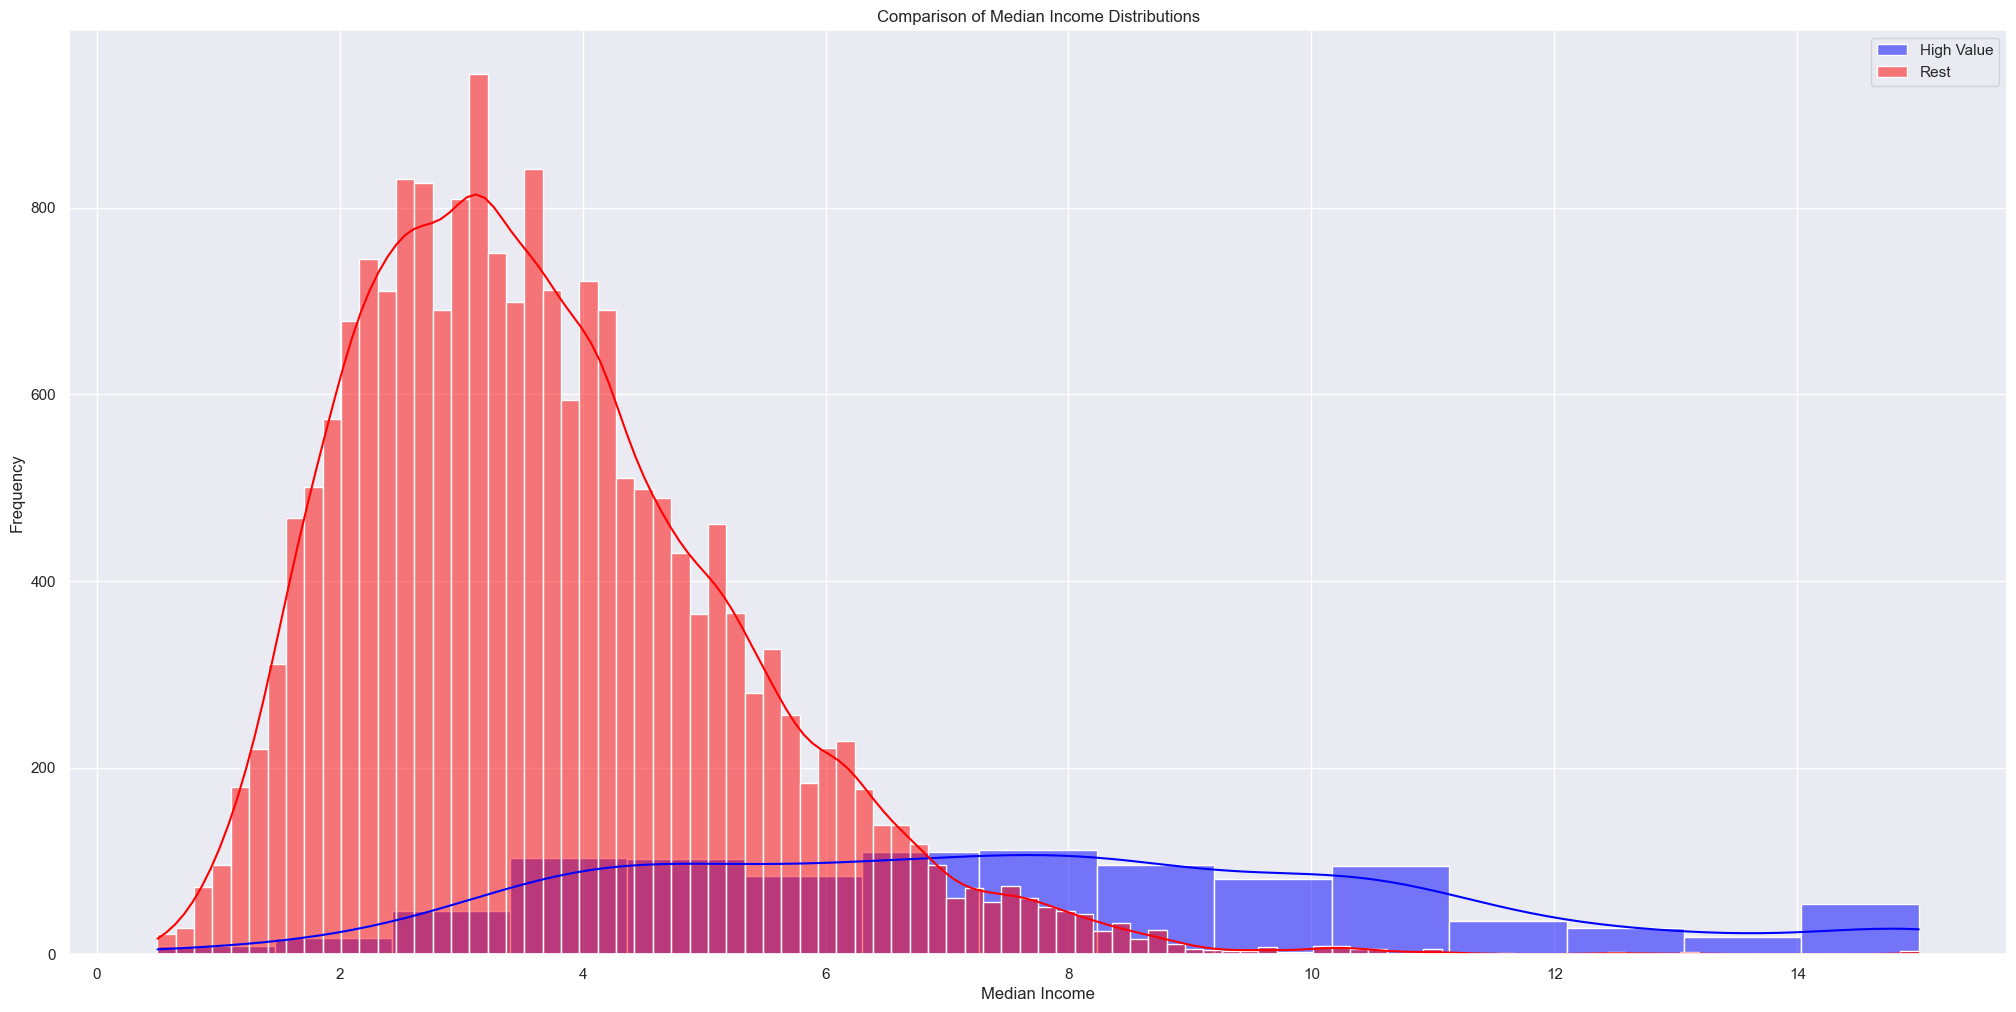

In [106]:
sns.histplot(high_value['median_income'], color='blue', label='High Value', kde=True, alpha=0.5)
sns.histplot(rest['median_income'], color='red', label='Rest', kde=True, alpha=0.5)

plt.title('Comparison of Median Income Distributions')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [107]:
high_value.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,992.00,992.00,992.00,992.00,985.00,992.00,992.00,992.00,992.00
mean,-119.71,35.24,33.92,2941.29,502.82,1110.72,466.80,7.72,500000.97
std,1.95,1.79,13.03,2144.91,396.20,809.60,359.28,3.27,0.16
min,-122.64,32.68,2.00,8.00,1.00,13.00,1.00,0.50,500000.00
25%,-122.12,33.98,25.00,1662.50,269.00,635.75,253.00,5.11,500001.00
50%,-118.48,34.13,34.00,2501.00,403.00,925.50,375.00,7.56,500001.00
75%,-118.32,37.40,45.00,3532.75,610.00,1338.75,577.00,10.07,500001.00
max,-116.43,38.91,52.00,18132.00,5419.00,7431.00,4930.00,15.00,500001.00


In [108]:
rest.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,19648.00,19648.00,19648.00,19648.00,19448.00,19648.00,19648.00,19648.00,19648.00
mean,-119.56,35.65,28.37,2620.34,539.65,1441.37,501.19,3.68,192055.33
std,2.01,2.15,12.50,2182.37,422.55,1144.08,383.39,1.57,97110.85
min,-124.35,32.54,1.00,2.00,2.00,3.00,2.00,0.50,14999.00
25%,-121.76,33.93,18.00,1438.00,297.00,796.00,282.00,2.53,116475.00
50%,-118.50,34.27,28.00,2111.00,436.00,1179.00,411.00,3.45,173600.00
75%,-117.99,37.73,37.00,3121.00,648.00,1746.25,606.00,4.58,247900.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,499100.00


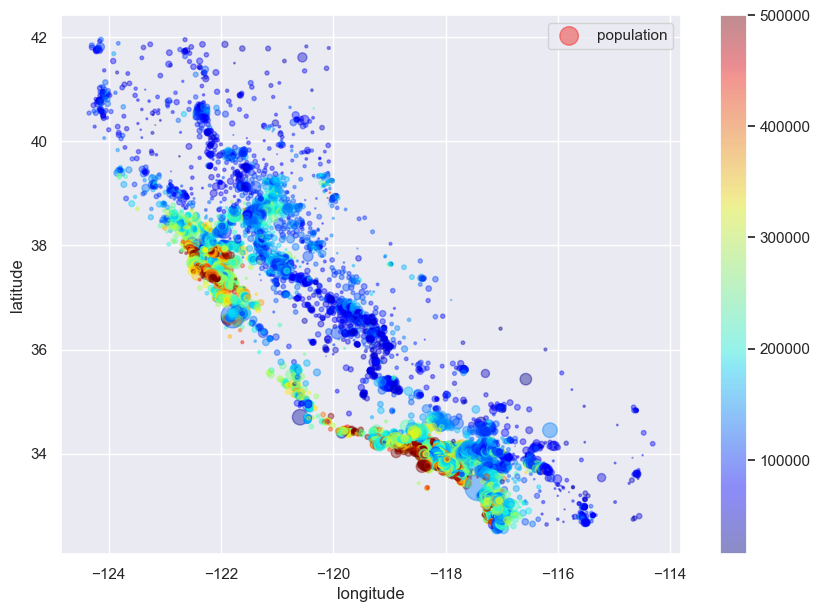

In [109]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population", figsize=(10,7),
             c=data["target"], cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

In [110]:
corr = data.corr(numeric_only= True)

In [111]:
corr["target"].sort_values(ascending= False)

target                1.00
median_income         0.69
total_rooms           0.13
housing_median_age    0.11
households            0.07
total_bedrooms        0.05
population           -0.02
longitude            -0.05
latitude             -0.14
Name: target, dtype: float64

In [112]:
data["total_rooms_per_households"] = data["total_rooms"] / data["households"]
data["total_bedrooms_per_households"] = data["total_bedrooms"] / data["households"]
data["income_per_household"] = data["median_income"] / data["households"]
data["total_rooms_not_bedrooms"] = data["total_rooms"] - data["total_bedrooms"] 
data["population_per_hosehold"] = data["population"] / data["households"]
data["income_per_population"] = data["median_income"] / data["population"]
data["total_rooms_not_bedrooms_per_households"] = data["total_rooms_not_bedrooms"] / data["households"]

In [113]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,total_rooms_per_households,total_bedrooms_per_households,income_per_household,total_rooms_not_bedrooms,population_per_hosehold,income_per_population,total_rooms_not_bedrooms_per_households
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,1.02,0.07,751.00,2.56,0.03,5.96
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,0.97,0.01,5993.00,2.11,0.00,5.27
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,1.07,0.04,1277.00,2.80,0.01,7.21
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,1.07,0.03,1039.00,2.55,0.01,4.74
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,1.08,0.01,1347.00,2.18,0.01,5.20


In [114]:
corr = data.corr(numeric_only= True)

In [115]:
corr["target"].sort_values(ascending= False)

target                                     1.00
median_income                              0.69
total_rooms_not_bedrooms_per_households    0.19
total_rooms_per_households                 0.15
total_rooms_not_bedrooms                   0.15
total_rooms                                0.13
income_per_population                      0.11
housing_median_age                         0.11
households                                 0.07
income_per_household                       0.06
total_bedrooms                             0.05
population_per_hosehold                   -0.02
population                                -0.02
longitude                                 -0.05
total_bedrooms_per_households             -0.05
latitude                                  -0.14
Name: target, dtype: float64

In [116]:
df = data.copy()
IMPORTANT_CENTERS = {
    'los_angeles': (34.0522, -118.2437),
    'san_francisco': (37.7749, -122.4194),
    'san_diego': (32.7157, -117.1611),
    'sacramento': (38.5816, -121.4944),  # State capital
    'silicon_valley': (37.3875, -122.0575),  # Palo Alto as proxy
    'fresno': (36.7378, -119.7871),  # Major Central Valley city
    'santa_barbara': (34.4208, -119.6982),
    'san_jose': (37.3382, -121.8863),
    'oakland': (37.8044, -122.2711),
    'anaheim': (33.8366, -117.9143),  # Disneyland location
    'golden_gate_bridge': (37.8199, -122.4783),
    'yosemite_valley': (37.8651, -119.5383),  # Yosemite National Park
    'death_valley': (36.5323, -116.9325),  # Death Valley National Park
    'big_sur': (36.2704, -121.8080)  # Scenic coastal area
}

def calculate_distances(row, centers):
    """Calculate distances from a property to all important centers."""
    property_coords = (row['latitude'], row['longitude'])
    distances = {}
    for name, center_coords in centers.items():
        distances[f'distance_to_{name}'] = great_circle(property_coords, center_coords).miles
    return pd.Series(distances)

distance_df = df.apply(lambda x: calculate_distances(x, IMPORTANT_CENTERS), axis=1)

# Combine with original dataframe
df_with_distances = pd.concat([df, distance_df], axis=1)

In [117]:
df_with_distances.sample(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,total_rooms_per_households,total_bedrooms_per_households,income_per_household,total_rooms_not_bedrooms,population_per_hosehold,income_per_population,total_rooms_not_bedrooms_per_households,distance_to_los_angeles,distance_to_san_francisco,distance_to_san_diego,distance_to_sacramento,distance_to_silicon_valley,distance_to_fresno,distance_to_santa_barbara,distance_to_san_jose,distance_to_oakland,distance_to_anaheim,distance_to_golden_gate_bridge,distance_to_yosemite_valley,distance_to_death_valley,distance_to_big_sur
14654,-117.14,32.80,33.00,2670.00,435.00,1256.00,431.00,3.94,179800.00,NEAR OCEAN,6.19,1.01,0.01,2235.00,2.91,0.00,5.19,107.40,454.58,5.95,468.13,421.47,310.77,184.95,412.62,450.69,84.43,459.05,375.13,258.15,357.80
15429,-117.24,33.21,18.00,1846.00,419.00,1581.00,387.00,3.10,111300.00,<1H OCEAN,4.77,1.08,0.01,1427.00,4.09,0.00,3.69,81.98,429.24,34.46,440.83,396.25,283.18,164.04,387.25,425.11,58.16,433.71,346.59,230.21,334.56
4280,-118.32,34.09,32.00,563.00,191.00,626.00,185.00,2.03,250000.00,<1H OCEAN,3.04,1.03,0.01,372.00,3.38,0.00,2.01,5.09,342.59,116.12,357.05,309.53,200.73,81.96,300.61,338.61,29.10,347.06,269.57,185.99,247.95
8097,-118.21,33.81,45.00,1816.00,398.00,1524.00,388.00,3.86,157900.00,NEAR OCEAN,4.68,1.03,0.01,1418.00,3.93,0.00,3.65,16.85,361.44,96.89,377.06,328.29,220.98,95.01,319.49,357.62,17.07,365.90,289.88,201.45,265.16
18926,-122.17,38.08,7.00,18392.00,2782.00,8276.00,2742.00,6.42,229200.00,NEAR BAY,6.71,1.01,0.00,15610.00,3.02,0.00,5.69,354.23,25.08,465.61,50.42,48.24,160.31,287.88,53.55,19.82,377.54,24.60,144.10,307.00,126.61
6845,-118.11,34.07,19.00,3215.00,907.00,3072.00,870.00,2.34,202300.00,<1H OCEAN,3.70,1.04,0.00,2308.00,3.53,0.00,2.65,7.75,351.58,108.41,364.16,318.63,207.11,93.89,309.59,347.43,19.64,356.05,274.10,182.62,258.30
18899,-122.25,38.11,52.00,2846.00,705.00,1519.00,620.00,2.20,97900.00,NEAR BAY,4.59,1.14,0.00,2141.00,2.45,0.00,3.45,358.60,24.93,469.96,52.33,51.02,165.07,291.83,56.91,21.15,381.94,23.59,148.63,311.79,129.41
7633,-118.29,33.84,34.00,2617.00,558.00,1396.00,515.00,5.06,218000.00,<1H OCEAN,5.08,1.08,0.01,2059.00,2.71,0.00,4.00,14.90,356.92,101.42,373.08,323.76,217.28,89.98,314.98,353.15,21.56,361.38,286.75,201.19,260.33
2286,-119.76,36.79,32.00,2463.00,468.00,1261.00,486.00,3.33,75100.00,INLAND,5.07,0.96,0.01,1995.00,2.59,0.00,4.10,207.53,161.25,317.79,155.93,133.18,3.91,163.73,123.19,154.79,229.05,165.47,75.27,157.72,119.23
13582,-117.29,34.12,40.00,2198.00,612.00,1517.00,531.00,1.10,65800.00,INLAND,4.14,1.15,0.00,1586.00,2.86,0.00,2.99,54.77,382.10,97.31,386.90,349.81,229.06,139.06,340.36,377.25,40.78,386.56,287.64,167.89,295.16


In [118]:
data = df_with_distances.copy()

corr = data.corr(numeric_only= True)
corr["target"].sort_values(ascending= False)

target                                     1.00
median_income                              0.69
total_rooms_not_bedrooms_per_households    0.19
total_rooms_per_households                 0.15
total_rooms_not_bedrooms                   0.15
total_rooms                                0.13
income_per_population                      0.11
distance_to_yosemite_valley                0.11
housing_median_age                         0.11
households                                 0.07
distance_to_sacramento                     0.06
income_per_household                       0.06
total_bedrooms                             0.05
distance_to_fresno                         0.05
distance_to_death_valley                   0.05
population_per_hosehold                   -0.02
distance_to_oakland                       -0.02
population                                -0.02
distance_to_golden_gate_bridge            -0.03
distance_to_san_francisco                 -0.03
distance_to_san_jose                    

In [119]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

----- ocean_proximity -----
                 count      mean   meadian           sum       std
ocean_proximity                                                   
<1H OCEAN         9136 240084.29 214850.00 2193410032.00 106124.29
INLAND            6551 124805.39 108500.00  817600123.00  70007.91
NEAR OCEAN        2658 249433.98 229450.00  662995512.00 122477.15
NEAR BAY          2290 259212.31 233800.00  593596194.00 122818.54
ISLAND               5 380440.00 414700.00    1902200.00  80559.56


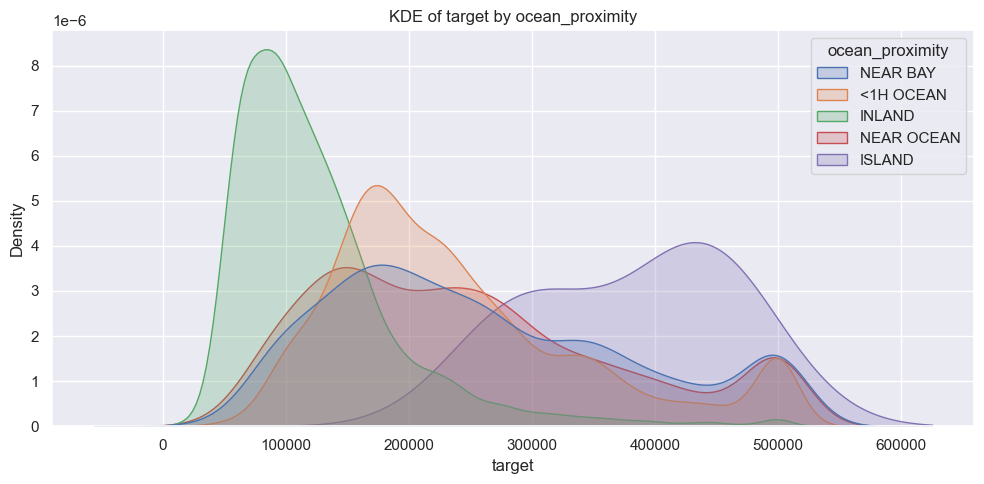

In [120]:
features = ["ocean_proximity"]
target = "target"

for feature in features:
  print(f"----- {feature} -----")
  stats = data.groupby(feature)[target].agg(
      count = 'count',
      mean = 'mean',
      meadian = 'median',
      sum = 'sum',
      std = 'std'
  ).sort_values(by = 'count', ascending = False)

  print(stats)

  plt.figure(figsize = [10,5])
  sns.kdeplot(data = data, x = target, hue = feature, fill = True, common_norm = False)
  plt.title(f"KDE of {target} by {feature}")
  plt.tight_layout()
  plt.show()

In [121]:
data_resampled = root.lib.oversample_minority_categories(data, "ocean_proximity")

Original proportions:
ocean_proximity
<1H OCEAN    0.44
INLAND       0.32
NEAR OCEAN   0.13
NEAR BAY     0.11
ISLAND       0.00
Name: count, dtype: float64

Target counts:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND        2290
Name: count, dtype: int64

New proportions after oversampling:
ocean_proximity
<1H OCEAN    0.40
INLAND       0.29
NEAR OCEAN   0.12
NEAR BAY     0.10
ISLAND       0.10
Name: count, dtype: float64


In [122]:
data_resampled.to_csv("../data/housing_resampled.csv",  index=False)